<a href="https://colab.research.google.com/github/EBUSYGIN/ML-3/blob/serobyan/intensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt

In [7]:
# Загрузка данных из train.xlsx
train_df = pd.read_excel('train.xlsx')

# Загрузка данных из test.xlsx
test_df = pd.read_excel('test.xlsx')

# Вывод первых строк для проверки
print(train_df.head())
print(test_df.head())

          dt  Цена на арматуру
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
3 2015-01-26             30700
4 2015-02-02             30300
          dt  Цена на арматуру
0 2022-09-05             46000
1 2022-09-12             46000
2 2022-09-19             46000
3 2022-09-26             45500
4 2022-10-03             45500


*В начале 2015 года цены находились в пределах 30 000, а к 2022 году они увеличились до примерно 45 000–46 000. Это свидетельствует о общем повышении цен на арматуру за рассматриваемый период.*

In [8]:
# Удаление дубликатов в train_df
train_df = train_df.drop_duplicates()

# Удаление дубликатов в test_df
test_df = test_df.drop_duplicates()

# Проверка количества строк после удаления дубликатов
print(f"Количество строк в train_df после удаления дубликатов: {len(train_df)}")
print(f"Количество строк в test_df после удаления дубликатов: {len(test_df)}")

Количество строк в train_df после удаления дубликатов: 400
Количество строк в test_df после удаления дубликатов: 28


In [21]:
# Проверка на пропущенные значения в train_df
print(train_df.isnull().sum())

# Проверка на пропущенные значения в test_df
print(test_df.isnull().sum())

# Удаление строк с пропущенными значениями
train_df = train_df.dropna()
test_df = test_df.dropna()



dt                  0
Цена на арматуру    0
dtype: int64
dt                  0
Цена на арматуру    0
dtype: int64


In [20]:
# Проверка количества строк после удаления пропущенных значений
print(f"Количество строк в train_df после удаления пропущенных значений: {len(train_df)}")
print(f"Количество строк в test_df после удаления пропущенных значений: {len(test_df)}")

Количество строк в train_df после удаления пропущенных значений: 400
Количество строк в test_df после удаления пропущенных значений: 28


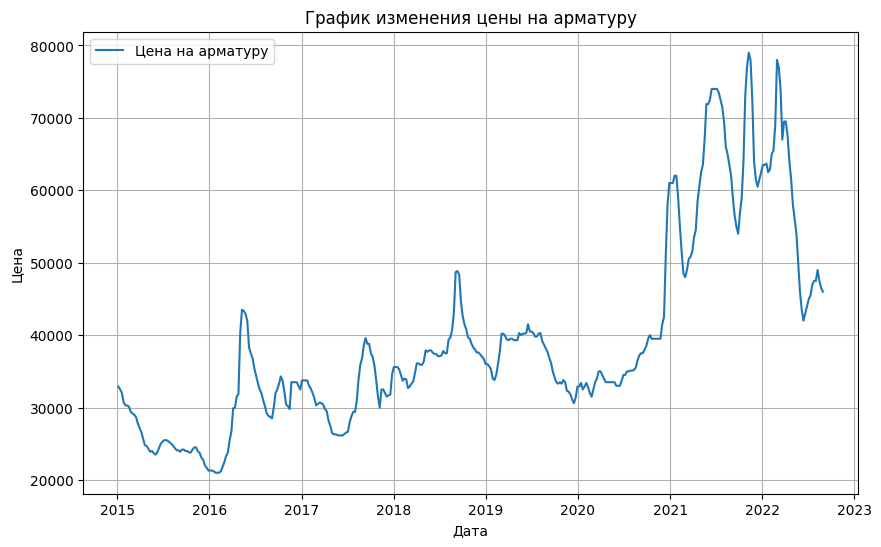

In [24]:
# Визуализация данных для поиска выбросов
plt.figure(figsize=(10, 6))
plt.plot(train_df['dt'], train_df['Цена на арматуру'], label='Цена на арматуру')
plt.title('График изменения цены на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()

*График демонстрирует изменения цен на арматуру за указанный период. С его помощью можно выявить периоды роста и снижения цен, а также определить, в какие годы цена достигала своих максимальных или минимальных значений.*

In [12]:
# Пример обработки выбросов: замена на среднее значение
mean_price = train_df['Цена на арматуру'].mean()
train_df['Цена на арматуру'] = train_df['Цена на арматуру'].apply(lambda x: mean_price if x > 100000 or x < 10000 else x)

# Проверка данных после обработки выбросов
print(train_df['Цена на арматуру'].describe())

count      400.000000
mean     39229.475000
std      13407.979668
min      21000.000000
25%      31075.000000
50%      35450.000000
75%      42000.000000
max      79000.000000
Name: Цена на арматуру, dtype: float64


In [28]:
#Преобразование столбца 'dt' в формат datetime
train_df['dt'] = pd.to_datetime(train_df['dt'])
test_df['dt'] = pd.to_datetime(test_df['dt'])

#Преобразование столбца 'Цена на арматуру' в числовой формат
train_df['Цена на арматуру'] = pd.to_numeric(train_df['Цена на арматуру'])
test_df['Цена на арматуру'] = pd.to_numeric(test_df['Цена на арматуру'])


In [29]:
#Проверка типов данных
print(train_df.dtypes)
print(test_df.dtypes)

dt                  datetime64[ns]
Цена на арматуру             int64
dtype: object
dt                  datetime64[ns]
Цена на арматуру             int64
dtype: object


In [14]:
from statsmodels.graphics.tsaplots import plot_acf

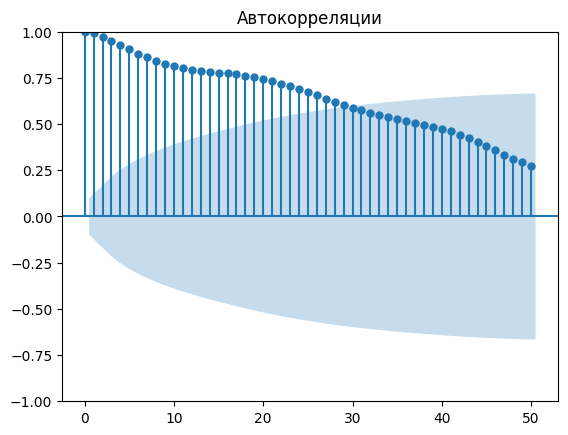

In [47]:
# График автокорреляции
plot_acf(train_df['Цена на арматуру'], lags=50)
plt.title('Автокорреляции')
plt.show()

*График показывает, как коррелируют значения временного ряда с его собственными предыдущими значениями на разных лагах. Это помогает оценить наличие периодичности или трендов в данных.*

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

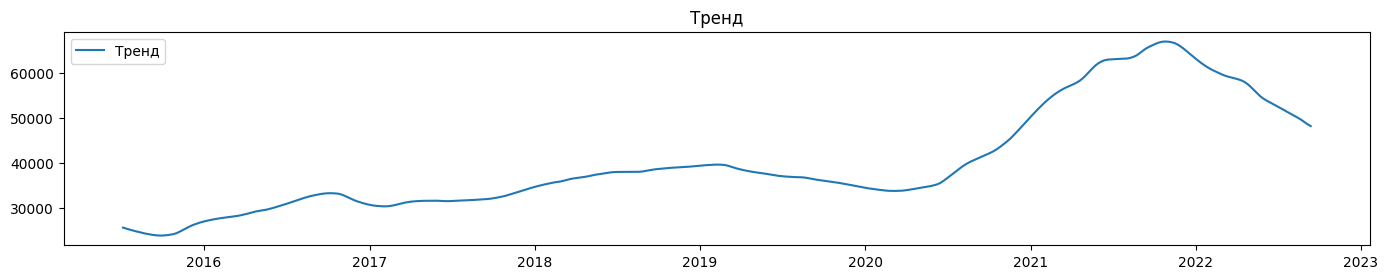

In [42]:
#Декомпозиция временного ряда
decomposition = seasonal_decompose(data['Цена на арматуру'], model='additive', period=52)
#Построение графиков
plt.figure(figsize=(14, 10))
#Тренд
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Тренд')
plt.legend(loc='upper left')
plt.title('Тренд')

plt.tight_layout()
plt.show()


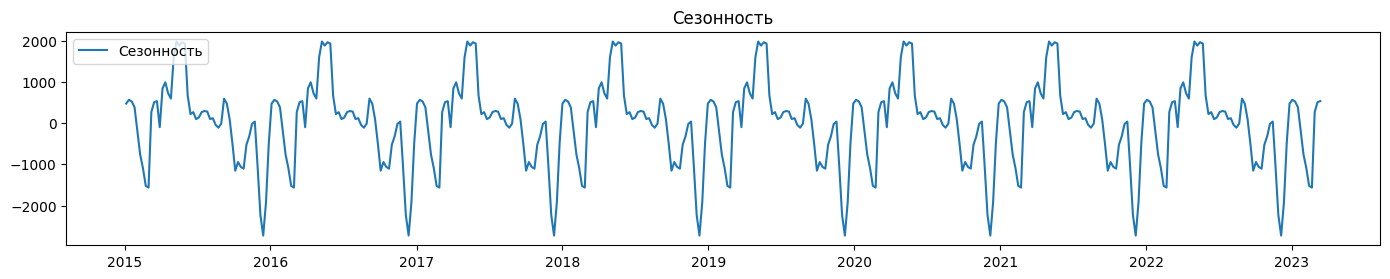

In [38]:
plt.figure(figsize=(14, 10))
#Сезонность
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Сезонность')
plt.legend(loc='upper left')
plt.title('Сезонность')

plt.tight_layout()
plt.show()


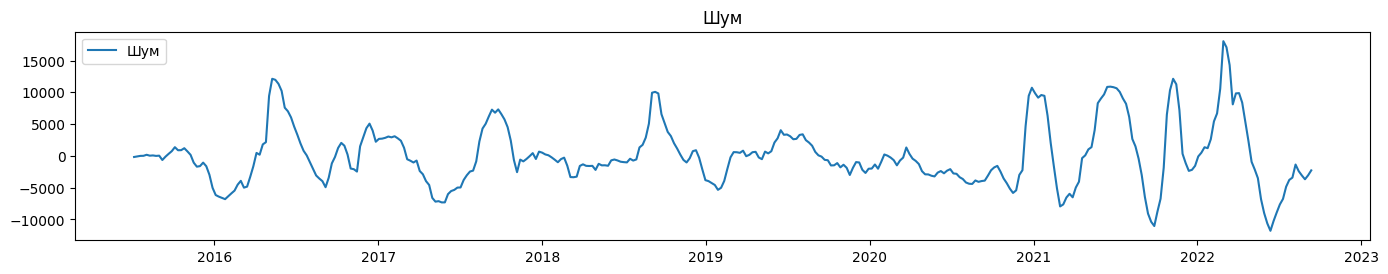

In [39]:
plt.figure(figsize=(14, 10))
# Шум
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Шум')
plt.legend(loc='upper left')
plt.title('Шум')

plt.tight_layout()
plt.show()


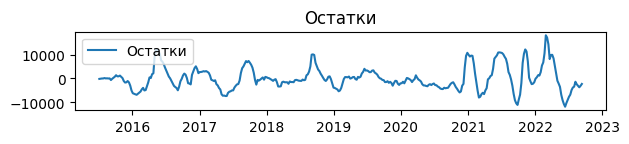

In [46]:
#Остатки
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Остатки')
plt.legend(loc='upper left')
plt.title('Остатки')

plt.tight_layout()
plt.show()